In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.utils import resample

import joblib

nltk.download("stopwords")
nltk.download("wordnet")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [52]:
df = pd.read_excel("chatgpt_style_reviews_dataset.xlsx")
df.head()


,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06 00:00:00,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,2025-03-07 00:00:00,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No


In [53]:
df['sentiment'] = df['rating'].apply(
    lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative"
)


In [54]:
stop = set(stopwords.words("english"))
for word in ["not", "no", "never"]:   # keep negative words
    if word in stop:
        stop.remove(word)

lemm = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    words = text.split()
    words = [lemm.lemmatize(w) for w in words if w not in stop]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean_text)


In [55]:
df_pos = df[df.sentiment == "Positive"]
df_neu = df[df.sentiment == "Neutral"]
df_neg = df[df.sentiment == "Negative"]

min_size = min(len(df_pos), len(df_neu), len(df_neg))

df_bal = pd.concat([
    resample(df_pos, n_samples=min_size, random_state=42),
    resample(df_neu, n_samples=min_size, random_state=42),
    resample(df_neg, n_samples=min_size, random_state=42)
])

df_bal = df_bal.sample(frac=1).reset_index(drop=True)


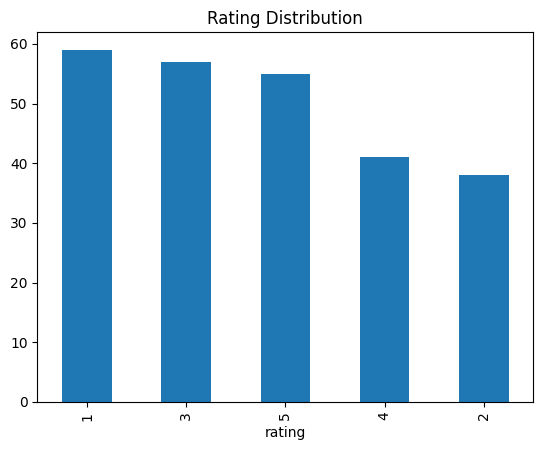

In [56]:
df['rating'].value_counts().plot(kind='bar')
plt.title("Rating Distribution")
plt.show()


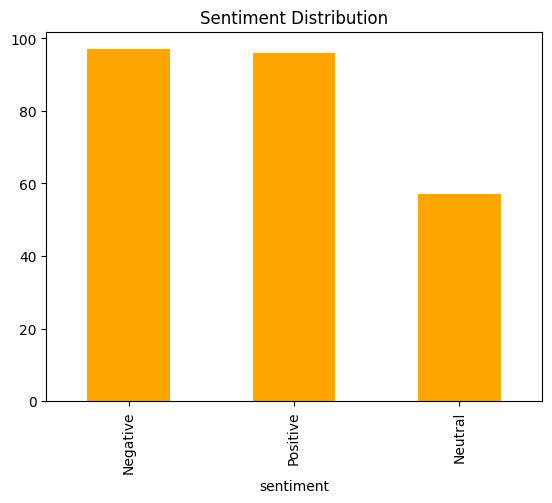

In [57]:
df['sentiment'].value_counts().plot(kind='bar', color='orange')
plt.title("Sentiment Distribution")
plt.show()


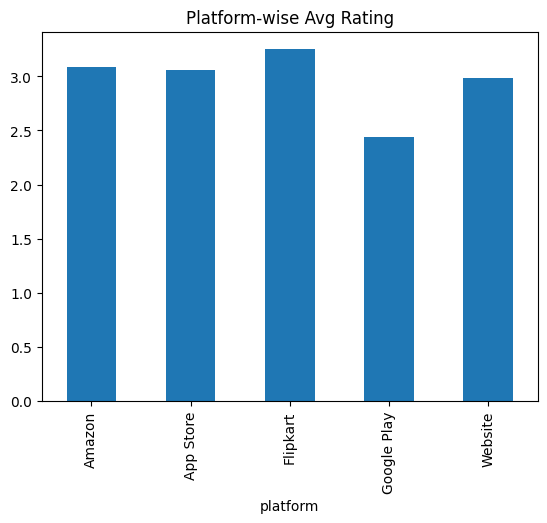

In [58]:
df.groupby("platform")['rating'].mean().plot(kind='bar')
plt.title("Platform-wise Avg Rating")
plt.show()


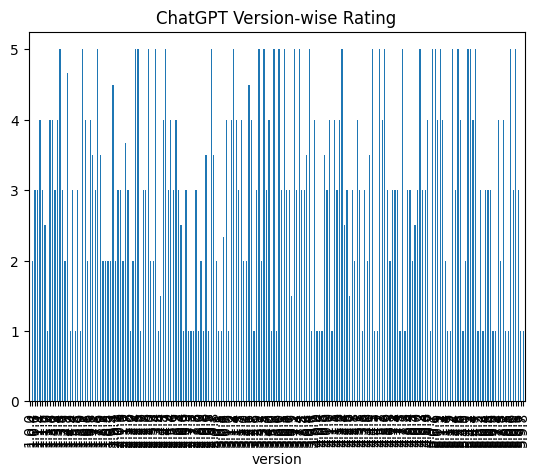

In [59]:
df.groupby("version")['rating'].mean().plot(kind='bar')
plt.title("ChatGPT Version-wise Rating")
plt.show()


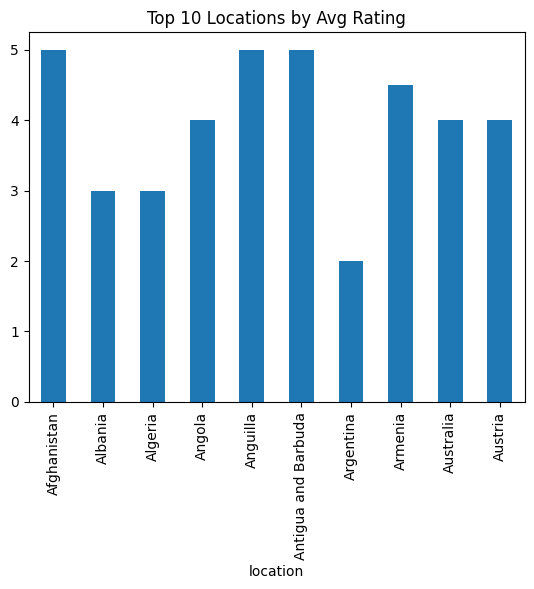

In [60]:
df.groupby("location")['rating'].mean().head(10).plot(kind='bar')
plt.title("Top 10 Locations by Avg Rating")
plt.show()


In [61]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_bal["clean_review"])
y = df_bal["sentiment"]


In [62]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [1]:
# ---------------------------------------
# IMPORT LIBRARIES
# ---------------------------------------
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils import resample
import joblib

# Download NLTK data
nltk.download("stopwords")
nltk.download("wordnet")

# ---------------------------------------
# LOAD DATASET
# ---------------------------------------
df = pd.read_excel("chatgpt_style_reviews_dataset.xlsx")
df.head()

# ---------------------------------------
# CREATE SENTIMENT COLUMN
# ---------------------------------------
df['sentiment'] = df['rating'].apply(
    lambda x: "Positive" if x >= 4 else "Neutral" if x == 3 else "Negative"
)

df[['rating', 'sentiment']].head()

# ---------------------------------------
# CLEAN TEXT FUNCTION
# ---------------------------------------
stop = set(stopwords.words("english"))

# Remove only the negative signal words from stopwords so they stay
for w in ["not", "no", "never"]:
    if w in stop:
        stop.remove(w)

lemm = WordNetLemmatizer()

def clean(t):
    t = str(t).lower()
    t = re.sub(r"[^a-zA-Z\s]", "", t)
    words = t.split()
    words = [lemm.lemmatize(i) for i in words if i not in stop]
    return " ".join(words)

df["clean_review"] = df["review"].apply(clean)
df[["review", "clean_review"]].head()

# ---------------------------------------
# BALANCE THE DATASET
# ---------------------------------------
pos = df[df.sentiment == "Positive"]
neu = df[df.sentiment == "Neutral"]
neg = df[df.sentiment == "Negative"]

min_len = min(len(pos), len(neu), len(neg))

pos = resample(pos, n_samples=min_len, random_state=42)
neu = resample(neu, n_samples=min_len, random_state=42)
neg = resample(neg, n_samples=min_len, random_state=42)

df_bal = pd.concat([pos, neu, neg]).sample(frac=1).reset_index(drop=True)

df_bal['sentiment'].value_counts()

# ---------------------------------------
# TF-IDF VECTORIZE
# ---------------------------------------
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df_bal["clean_review"])
y = df_bal["sentiment"]

# ---------------------------------------
# TRAIN-TEST SPLIT
# ---------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ---------------------------------------
# TRAIN MODEL (SVM)
# ---------------------------------------
model = LinearSVC()
model.fit(X_train, y_train)

# ---------------------------------------
# MODEL EVALUATION
# ---------------------------------------
print("Classification Report:")
print(classification_report(y_test, model.predict(X_test)))

# ---------------------------------------
# SAVE MODEL + TF-IDF
# ---------------------------------------
joblib.dump(model, "sentiment_model.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("\nMODEL SAVED SUCCESSFULLY!")
print("Files created: sentiment_model.pkl, tfidf_vectorizer.pkl")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Aniruth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Classification Report:
              precision    recall  f1-score   support

    Negative       0.38      0.38      0.38         8
     Neutral       0.71      0.67      0.69        15
    Positive       0.54      0.58      0.56        12

    accuracy                           0.57        35
   macro avg       0.54      0.54      0.54        35
weighted avg       0.58      0.57      0.57        35


MODEL SAVED SUCCESSFULLY!
Files created: sentiment_model.pkl, tfidf_vectorizer.pkl
